In [ ]:
import datetime

import click
import numpy as np
import pytorch_lightning as L

from bliss import DATASETS_DIR, HOME_DIR
from bliss.datasets.generate_blends import generate_dataset
from bliss.datasets.padded_tiles import generate_padded_tiles
from bliss.datasets.io import save_dataset_npz
from bliss.datasets.lsst import (
    GALAXY_DENSITY,
    STAR_DENSITY,
    get_default_lsst_psf,
    prepare_final_galaxy_catalog,
    prepare_final_star_catalog,
)
import matplotlib.pyplot as plt 
import torch
LOG_FILE = HOME_DIR / "experiment/log.txt"

CATSIM_CAT = prepare_final_galaxy_catalog()
STAR_MAGS = prepare_final_star_catalog()

PSF = get_default_lsst_psf()


In [ ]:
CATSIM_CAT = prepare_final_galaxy_catalog()
STAR_MAGS = prepare_final_star_catalog()

In [ ]:
t = generate_padded_tiles(n_samples=512, catsim_table = CATSIM_CAT, all_star_mags=STAR_MAGS, psf=PSF, p_source_in=1.0, galaxy_prob=1.0)

100%|██████████| 512/512 [00:10<00:00, 47.65it/s]


In [ ]:
t.keys()

dict_keys(['images', 'paddings', 'uncentered_sources', 'centered_sources', 'tile_params'])

In [ ]:
t['images'].shape

torch.Size([512, 1, 52, 52])

In [ ]:
import torch
device = torch.device('cuda:0')

In [ ]:
im = t['uncentered_sources'].to(device)
ll = t['tile_params']['locs'].to(device)

In [ ]:
from bliss.grid import get_shift_sources_fnc, shift_sources
fnc = get_shift_sources_fnc(slen=52, pixel_scale=0.2)


In [ ]:
%time im_out = shift_sources(im, ll, shift_fnc=fnc, tile_slen=4, slen=52, center=True)

CPU times: user 15.8 ms, sys: 3.58 ms, total: 19.3 ms
Wall time: 21.5 ms


In [ ]:
t['tile_params']['galaxy_params'][:, -1]

tensor([5.2562e+04, 1.5773e+04, 3.7779e+04, 4.4257e+04, 1.5963e+04, 3.0988e+04,
        3.6405e+04, 1.7186e+05, 5.8061e+04, 1.2812e+04, 2.7598e+04, 1.1847e+04,
        1.9762e+04, 7.3690e+04, 8.0536e+04, 8.8670e+05, 1.8182e+04, 4.5096e+04,
        1.4549e+04, 1.8057e+04, 3.6640e+05, 4.1524e+05, 4.5325e+04, 1.4799e+05,
        1.3596e+04, 1.4657e+07, 1.2143e+05, 9.9500e+04, 3.9185e+05, 1.2470e+04,
        1.6276e+05, 1.7168e+04, 4.5987e+05, 9.5661e+05, 2.9589e+04, 1.5507e+04,
        7.1515e+04, 1.6358e+04, 1.4368e+04, 1.4348e+04, 1.1532e+05, 3.6508e+04,
        3.2779e+06, 7.0646e+04, 2.9675e+05, 1.4503e+04, 3.6520e+04, 1.5866e+04,
        2.6815e+04, 4.4494e+04, 1.3509e+04, 1.7732e+04, 1.5119e+04, 1.3349e+04,
        2.2323e+05, 2.5103e+04, 6.9006e+04, 1.9628e+04, 1.5863e+05, 9.5039e+04,
        1.3538e+05, 3.0956e+04, 4.8037e+04, 1.5497e+06, 9.4480e+04, 1.8445e+04,
        3.2700e+04, 1.1534e+04, 1.1931e+04, 1.4347e+04, 1.8919e+05, 3.3426e+05,
        1.7195e+04, 1.1466e+04, 3.5863e+

In [ ]:
t['tile_params']['locs'][:, 0] > 0.9

tensor([False, False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False,  True, False, False,
        False,  True, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [ ]:
t['images'].shape

torch.Size([512, 1, 52, 52])

In [ ]:
# t['tile_params']['locs']

In [ ]:
t['paddings'].shape

torch.Size([512, 1, 52, 52])

In [ ]:
t['tile_params']['locs'][10]

tensor([0.9126, 0.4776])

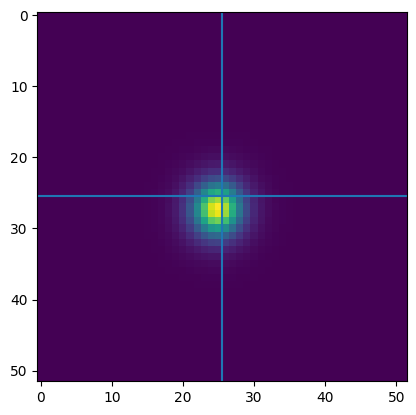

In [ ]:
plt.imshow(t['uncentered_sources'][7,0])
plt.axvline(25.5)
plt.axhline(25.5)

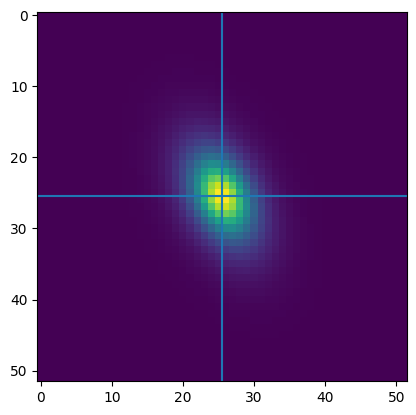

In [ ]:
plt.imshow(im_out[200,0].cpu())
plt.axvline(25.5)
plt.axhline(25.5)

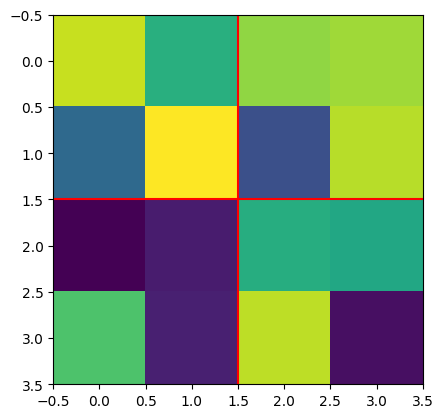

In [ ]:
# center of plt always forget
plt.imshow(torch.rand(4, 4))
plt.axvline(2-0.5, color='r')
plt.axhline(2-0.5, color='r')